In [1]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares argentinas
materias = ['Matemática', 'Lengua y Literatura', 'Historia', 'Geografía', 'Ciencias Naturales', 'Educación Física', 'Inglés', 'Artes', 'Música', 'Tecnología']

# Generar datos aleatorios para 100 filas
n_filas = 100
apellidos = ['Smith', 'Jones', 'Williams', 'Brown', 'Davis', 'Miller', 'Wilson', 'Moore', 'Taylor', 'Anderson']
nombres = ['John', 'Jane', 'Michael', 'Emily', 'David', 'Jessica', 'Kevin', 'Ashley', 'Brian', 'Sarah']

data = []
for _ in range(n_filas):
    apellido = random.choice(apellidos)
    nombre = random.choice(nombres)
    nro_dni = random.randint(10000000, 99999999)
    materia = random.choice(materias)
    nota1 = random.randint(1, 10)
    nota2 = random.randint(1, 10)
    nota3 = random.randint(1, 10)
    faltas = random.randint(0, 20)
    data.append([apellido, nombre, nro_dni, materia, nota1, nota2, nota3, faltas])


# Crear el DataFrame
df = pd.DataFrame(data, columns=['Apellido', 'Nombre', 'Nro_DNI', 'Materia', 'Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre', 'Faltas a clases'])

# Mostrar las primeras 10 filas del DataFrame
print(df.head(10))

  Apellido   Nombre   Nro_DNI             Materia  Nota 1er Trimestre  \
0    Moore     Jane  16040375              Música                   7   
1   Miller  Jessica  37174721    Educación Física                  10   
2   Wilson    Sarah  68382854              Inglés                   4   
3    Moore  Michael  45108528          Tecnología                   5   
4    Jones    Brian  32463692               Artes                  10   
5    Brown  Jessica  73905167          Tecnología                   7   
6   Wilson    Brian  82566946           Geografía                   8   
7    Davis    Kevin  57052311    Educación Física                   9   
8    Jones     John  53690870  Ciencias Naturales                   4   
9    Smith     John  27923470           Geografía                   2   

   Nota 2do Trimestre  Nota 3er Trimestre  Faltas a clases  
0                   3                   4                5  
1                   7                   6                3  
2            

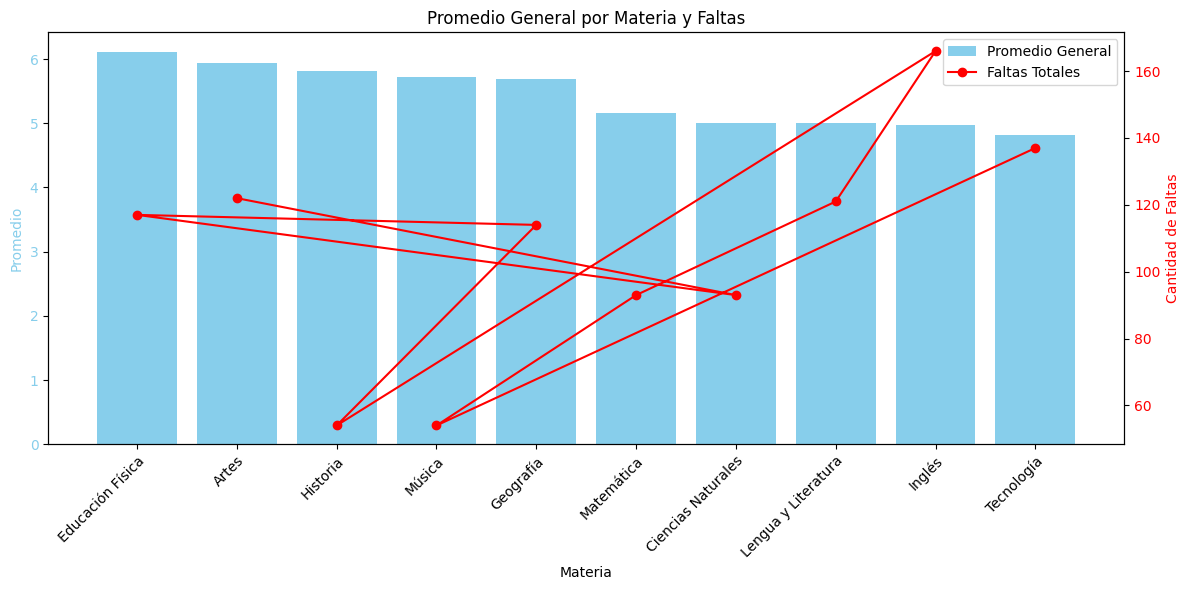

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import pandas as pd
import matplotlib.pyplot as plt

# ... (código anterior) ...

# Calcular el promedio de cada materia
promedio_materias = df.groupby('Materia')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar las materias por promedio de mayor a menor
promedio_materias = promedio_materias.sort_values(ascending=False)

# Calcular la cantidad total de faltas por materia
faltas_materias = df.groupby('Materia')['Faltas a clases'].sum()

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barra del promedio
ax1.bar(promedio_materias.index, promedio_materias.values, color='skyblue', label='Promedio General')
ax1.set_xlabel('Materia')
ax1.set_ylabel('Promedio', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General por Materia y Faltas')

# Eje secundario para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_materias.index, faltas_materias.values, color='red', marker='o', label='Faltas Totales')
ax2.set_ylabel('Cantidad de Faltas', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Rotar etiquetas del eje x para mejor legibilidad
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Mostrar leyendas
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()